# Lodaing Libraries and Dataset

### 1. Importing Libraries

These are some of the libraries which I will be using during my Exploratory Data Analysis Case Study!!



In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing Airbnb Dataset

In [4]:
airbnb = pd.read_csv(r"E:\python_work\P_fundamentals\Airbnb_dataset\datasets.csv",encoding_errors='ignore')

In [5]:
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn Â· â˜…5.0 Â· 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20-12-2015,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York Â· â˜…4.67 Â· 2 bedroo...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01-05-2023,0.24,139.0,364.0,2.0,No License,5,2,1,1
2,9.710000e+17,Rental unit in New York Â· â˜…4.17 Â· 1 bedroo...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18-12-2023,1.67,1.0,343.0,6.0,Exempt,4,1,2,1


# Inital Exploration

### 1. Getting the Overall Understanding of the data
- There are 22 columns out of which 10 are of **float type**, 10 of **objects(String)**, 2 of **Integers**
- Some of the records are missing in column naming **neighbourhood**, **room_type**, **Price** etc.

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

### 2. Segregating Columns Based on the Info
Seperating columns based on some criteria, this makes univariate and bivarirate analysis more convinient for me.

#### Numerical Columns
- There are 10 numeric columns which might be usefull, specially **price**, **rating column** and **License**

#### Categorical Columns
- I can see only two categorical columns **neighbourhood_group** and **room_type**

#### Mixed columns
- There are 10 mixed columns, specially **neighbourhood**







In [7]:
airbnb['room_type'].value_counts()

room_type
Entire home/apt    11555
Private room        8803
Shared room          293
Hotel room           112
Name: count, dtype: int64

In [8]:
airbnb['baths'].value_counts()

baths
1                17026
2                 2083
1.5               1001
2.5                240
3                  171
0                   82
4                   69
3.5                 50
4.5                 18
Not specified       13
5                    6
6                    4
5.5                  2
6.5                  2
11.5                 1
7                    1
15.5                 1
Name: count, dtype: int64

In [9]:
# There are 20,770 rows and 22 columns
airbnb.shape

(20770, 22)

#### Statistical Summary of all the numeric columns

In [10]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,3.975108,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.898378,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,4.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,5.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,5.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,5.000000,42.000000


By looking at the summary, I am more interested about the price column as I can clearly see that 100k is the Outlier and can make the data highly skewed and inefficient for analysis.

# Data Cleaning

#### 1. Cleaning the name column and extracting useful Information

In [11]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn Â· â˜…5.0 Â· 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,...,20-12-2015,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York Â· â˜…4.67 Â· 2 bedroo...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,...,01-05-2023,0.24,139.0,364.0,2.0,No License,5,2,1,1


**The column "name" has lots of Non_ASCII characters which makes it difficult to read.**

In [12]:
import re

def clean_name(name):
    # Removes non-ASCII characters
    name = re.sub(r'[^\x00-\x7F]+', ' ', name)  
    # Replace multiple spaces with one
    name = re.sub(r'\s+', ' ', name)
    # Remove unnecessary ellipses or symbols
    name = re.sub(r'\.{3,}', '', name)
    # Trim leading and trailing whitespace
    name = name.strip()
    return name

airbnb['name'] = airbnb['name'].apply(clean_name)


In [13]:
airbnb['name']

0                    Rental unit in Brooklyn 5.0 1 bedroom
1        Rental unit in New York 4.67 2 bedrooms 1 bed ...
2        Rental unit in New York 4.17 1 bedroom 2 beds ...
3        Rental unit in New York 4.64 1 bedroom 1 priva...
4               Condo in New York 4.91 Studio 1 bed 1 bath
                               ...                        
20765    Rental unit in New York 4.75 1 bedroom 1 bed 1...
20766    Rental unit in New York 4.46 1 bedroom 2 beds ...
20767        Rental unit in New York 4.93 1 bedroom 1 bath
20768    Rental unit in New York 5.0 1 bedroom 1 bed 1 ...
20769    Rental unit in Queens 4.89 1 bedroom 1 bed 1 s...
Name: name, Length: 20770, dtype: object

**It cleaner now, but still have lots of information in a single column, so lets figure it out later!!**

In [14]:
df = airbnb['name'].str.split(expand=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Rental,unit,in,Brooklyn,5.0,1,bedroom,None,None,None,None,None,None,None
1,Rental,unit,in,New,York,4.67,2,bedrooms,1,bed,1,bath,None,None
2,Rental,unit,in,New,York,4.17,1,bedroom,2,beds,1,bath,None,None
3,Rental,unit,in,New,York,4.64,1,bedroom,1,private,bath,None,None,None
4,Condo,in,New,York,4.91,Studio,1,bed,1,bath,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,Rental,unit,in,New,York,4.75,1,bedroom,1,bed,1,shared,bath,None
20766,Rental,unit,in,New,York,4.46,1,bedroom,2,beds,1,bath,None,None
20767,Rental,unit,in,New,York,4.93,1,bedroom,1,bath,None,None,None,None
20768,Rental,unit,in,New,York,5.0,1,bedroom,1,bed,1,bath,None,None


#### Extracting only desired columns (Feature Engineering)
- Lets get only column 0 and 3 as rest are repeated information which is already there in the dataset
- Renaming the columns so that I can extract them efficiently


In [15]:
df = df.rename(columns ={0:'Property_type',3:'City_name'})

In [16]:
df

,Property_type,1,2,City_name,4,5,6,7,8,9,10,11,12,13
0,Rental,unit,in,Brooklyn,5.0,1,bedroom,None,None,None,None,None,None,None
1,Rental,unit,in,New,York,4.67,2,bedrooms,1,bed,1,bath,None,None
2,Rental,unit,in,New,York,4.17,1,bedroom,2,beds,1,bath,None,None
3,Rental,unit,in,New,York,4.64,1,bedroom,1,private,bath,None,None,None
4,Condo,in,New,York,4.91,Studio,1,bed,1,bath,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,Rental,unit,in,New,York,4.75,1,bedroom,1,bed,1,shared,bath,None
20766,Rental,unit,in,New,York,4.46,1,bedroom,2,beds,1,bath,None,None
20767,Rental,unit,in,New,York,4.93,1,bedroom,1,bath,None,None,None,None
20768,Rental,unit,in,New,York,5.0,1,bedroom,1,bed,1,bath,None,None


#### Cleaning the city name mess in city_name column

In [17]:
df['City_name'] = df['City_name'].replace('New','New York')
df['City_name'] = df['City_name'].replace('York','New York')

In [18]:
df['City_name'].value_counts()

City_name
New York     8088
Brooklyn     5189
Queens       1732
5.0           623
Bronx         417
             ... 
Oakland         1
ozone           1
elmhurst        1
4.21            1
Flushing,       1
Name: count, Length: 217, dtype: int64

**There still are lots of unwanted values**

In [19]:
df.sample(18)

,Property_type,1,2,City_name,4,5,6,7,8,9,10,11,12,13
20194,Home,in,Bronx,4.70,1,bedroom,1,bed,1,shared,bath,None,None,None
17198,Rental,unit,in,New York,York,4.30,Studio,1,bed,1,bath,None,None,None
329,Condo,in,New,New York,1,bedroom,1,bed,1,bath,None,None,None,None
7097,Hotel,in,New,New York,1,bedroom,1,bed,1,bath,None,None,None,None
18966,Rental,unit,in,New York,York,4.77,1,bedroom,1,bed,1,bath,None,None
14335,Rental,unit,in,Queens,1,bedroom,2,beds,1,bath,None,None,None,None
10538,Serviced,apartment,in,Brooklyn,4.75,1,bedroom,1,bed,1,bath,None,None,None
11687,Rental,unit,in,Brooklyn,1,bedroom,1,bed,1,shared,bath,None,None,None
7535,Rental,unit,in,New York,York,4.77,2,bedrooms,3,beds,1,bath,None,None
12908,Guest,suite,in,Brooklyn,4.82,Studio,1,bed,1,bath,None,None,None,None


In [20]:
airbnb.sample(80)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
17407,9.464605e+06,Rental unit in New York 4.98 1 bedroom 1 bed 1...,5776966,Lily,Manhattan,Gramercy,40.737530,-73.980260,Private room,49.0,...,27-12-2023,1.40,1.0,147.0,23.0,No License,5,1,1,1
15963,7.790000e+17,Rental unit in Brooklyn 4 bedrooms 1 bed 2 sha...,489878101,Megan,Brooklyn,Bedford-Stuyvesant,40.679748,-73.911013,Private room,65.0,...,03-09-2023,0.18,8.0,340.0,2.0,No License,0,4,1,2
8615,6.200000e+17,Home in Queens 4.82 1 bedroom 2 beds 1 shared ...,457438946,The Snow Effect,Queens,Hollis,40.709550,-73.762670,Shared room,159.0,...,05-12-2023,2.80,1.0,365.0,20.0,No License,5,1,2,1
20435,1.612208e+07,Rental unit in New York 4.13 Studio 1 bed 1 bath,7245581,Michael,Manhattan,Washington Heights,40.834049,-73.939568,Entire home/apt,79.0,...,05-08-2023,0.11,16.0,364.0,1.0,No License,4,Studio,1,1
3954,7.180000e+17,Rental unit in Queens 4.64 1 bedroom 1 bed 1 bath,212164658,Jason,Queens,Flushing,40.757830,-73.825090,Entire home/apt,129.0,...,04-09-2023,3.73,4.0,180.0,39.0,No License,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,3.345532e+07,Rental unit in Brooklyn 1 bedroom 1 bed 1 shar...,6410979,Alice,Brooklyn,Bedford-Stuyvesant,40.688980,-73.944050,Private room,59.0,...,15-04-2019,0.02,2.0,0.0,0.0,No License,0,1,1,1
5358,7.250000e+17,Home in Brooklyn 4.73 2 bedrooms 2 beds 1 bath,49199759,Darrol,Brooklyn,Bedford-Stuyvesant,40.694180,-73.933520,Entire home/apt,280.0,...,12-11-2023,3.19,1.0,91.0,34.0,No License,5,2,2,1
11823,5.650000e+17,Rental unit in Brooklyn 4.92 1 bedroom 3 beds ...,71876303,Veronica,Brooklyn,Bay Ridge,40.640550,-74.029570,Entire home/apt,120.0,...,11-09-2023,2.29,1.0,279.0,15.0,No License,5,1,3,1
9424,9.340000e+17,Rental unit in Brooklyn 1 bedroom 2 beds 1.5 b...,57250707,Elisa,Brooklyn,Bedford-Stuyvesant,40.685961,-73.952988,Entire home/apt,135.0,...,28-10-2023,0.42,1.0,162.0,2.0,No License,0,1,2,1.5


In [21]:
airbnb['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        8050
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
Name: count, dtype: int64

In [22]:
airbnb[airbnb['neighbourhood_group'] == 'Staten Island'].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
49,39125813.0,Rental unit in Staten Island 5.0 1 bedroom 3 b...,77290831,Nas,Staten Island,Prince's Bay,40.52339,-74.20517,Entire home/apt,118.0,...,25-06-2022,0.15,1.0,179.0,0.0,No License,5,1,3,1
51,53832868.0,Home in Staten Island 4.74 1 bedroom 2 beds 1 ...,39553567,Bianca,Staten Island,Port Richmond,40.62866,-74.14578,Entire home/apt,75.0,...,10-10-2023,1.43,2.0,339.0,14.0,No License,5,1,2,1
67,43197566.0,Rental unit in Staten Island 4.73 2 bedrooms 4...,338412156,Michael,Staten Island,St. George,40.64557,-74.08443,Entire home/apt,160.0,...,04-09-2023,1.49,3.0,364.0,10.0,No License,5,2,4,1


### Observation
- I can see that where ever the neighbourhood_group is Manhattan, the city_name is New York and for rest both neighbourhood_group and city_name are same.
- Well its impossible to change everything now, and now i will only extract the property_type column and replace manhattan in neighbourhood_group with Manhattan(New York).


In [23]:
df['Property_type']

0        Rental
1        Rental
2        Rental
3        Rental
4         Condo
          ...  
20765    Rental
20766    Rental
20767    Rental
20768    Rental
20769    Rental
Name: Property_type, Length: 20770, dtype: object

In [24]:
airbnb['Property_type'] = df['Property_type']

In [25]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type
0,1312228.0,Rental unit in Brooklyn 5.0 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,Rental
1,45277537.0,Rental unit in New York 4.67 2 bedrooms 1 bed ...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,5,2,1,1,Rental


**Property_type column Successfully added, now its time to replace Manhattan with Manhattan(Newyork)**

In [26]:
airbnb['neighbourhood_group'].replace('Manhattan','Manhattan(New York)',inplace=True)

In [27]:
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type
0,1.312228e+06,Rental unit in Brooklyn 5.0 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,Rental
1,4.527754e+07,Rental unit in New York 4.67 2 bedrooms 1 bed ...,51501835,Jeniffer,Manhattan(New York),Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,5,2,1,1,Rental
2,9.710000e+17,Rental unit in New York 4.17 1 bedroom 2 beds ...,528871354,Joshua,Manhattan(New York),Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4,1,2,1,Rental


**Now we do not want 'name' column, so I will drop it now**

In [28]:
airbnb.drop('name', axis=1, inplace=True)

In [29]:
airbnb.head(2)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type
0,1312228.0,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,30.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,Rental
1,45277537.0,51501835,Jeniffer,Manhattan(New York),Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,30.0,...,0.24,139.0,364.0,2.0,No License,5,2,1,1,Rental


### 2. Treating Null Values

In [30]:
airbnb.isnull().sum()

id                                 0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
Property_type                      0
dtype: int64

**12 columns have null values**, price have 34 null values rest have 7 null values in each column.

### Price column
- Its an important column for analysis, considering it has an outlier (100k), filling its 34 null values with median will be more efficient option, instead of filling with mean or simply zero(0).

In [31]:
median_price = airbnb['price'].median()

airbnb['price'].fillna(median_price,inplace=True)

In [32]:
airbnb['price'].isnull().sum()

0

### Other Columns
- Dropping rows of other column's null values seems an only option for me, as some of columns are not necessary for analysis and for some I need data to fill them.

In [33]:
airbnb.dropna(inplace=True)

In [34]:
airbnb.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
Property_type                     0
dtype: int64

In [35]:
airbnb.shape

(20763, 22)

**All Missing/Null Values are dropped**

In [36]:
airbnb['price'].describe()

count     20763.000000
mean        187.633386
std        1022.582064
min          10.000000
25%          80.000000
50%         125.000000
75%         199.000000
max      100000.000000
Name: price, dtype: float64

### 3. Dealing with duplicated data 
- 12 rows are duplicated in airbnb dataset

In [37]:
airbnb.duplicated().sum()

12

In [38]:
airbnb[airbnb.duplicated()]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type
6,4.527754e+07,51501835,Jeniffer,Manhattan(New York),Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,...,0.24,139.0,364.0,2.0,No License,5,2,1,1,Rental
7,9.710000e+17,528871354,Joshua,Manhattan(New York),Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,...,1.67,1.0,343.0,6.0,Exempt,4,1,2,1,Rental
8,3.857863e+06,19902271,John And Catherine,Manhattan(New York),Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,...,1.38,2.0,363.0,12.0,No License,5,1,1,1,Rental
9,4.089661e+07,61391963,Stay With Vibe,Manhattan(New York),Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,...,0.24,133.0,335.0,3.0,No License,5,Studio,1,1,Condo
10,4.958498e+07,51501835,Jeniffer,Manhattan(New York),Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,30.0,...,0.16,139.0,276.0,2.0,No License,5,1,1,1,Rental
20736,7.990000e+17,224733902,CozySuites Copake,Manhattan(New York),Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,30.0,...,0.41,8.0,308.0,2.0,No License,0,2,2,2,Rental
20737,5.930000e+17,23219783,Rob,Manhattan(New York),West Village,40.730220,-74.002910,Entire home/apt,175.0,30.0,...,2.03,4.0,129.0,25.0,No License,5,2,2,1,Rental
20738,9.230000e+17,520265731,Rodrigo,Manhattan(New York),Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,2.0,...,2.60,1.0,356.0,9.0,Exempt,4,1,2,1,Loft
20739,1.336161e+07,8961407,Jamie,Manhattan(New York),Harlem,40.805700,-73.946250,Entire home/apt,397.0,30.0,...,1.08,3.0,274.0,3.0,No License,5,2,2,1,Rental
20740,5.119566e+07,51501835,Jeniffer,Manhattan(New York),Chinatown,40.718360,-73.995850,Entire home/apt,100.0,30.0,...,0.08,139.0,306.0,1.0,No License,0,Studio,1,1,Rental


**Dropping Duplicates**


In [39]:
airbnb.drop_duplicates(inplace=True)

In [40]:
airbnb.duplicated().sum()

0

In [41]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20751 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20751 non-null  float64
 1   host_id                         20751 non-null  int64  
 2   host_name                       20751 non-null  object 
 3   neighbourhood_group             20751 non-null  object 
 4   neighbourhood                   20751 non-null  object 
 5   latitude                        20751 non-null  float64
 6   longitude                       20751 non-null  float64
 7   room_type                       20751 non-null  object 
 8   price                           20751 non-null  float64
 9   minimum_nights                  20751 non-null  float64
 10  number_of_reviews               20751 non-null  float64
 11  last_review                     20751 non-null  object 
 12  reviews_per_month               20751

**Changing baths column data type to int**

In [42]:
airbnb['baths']

0        Not specified
1                    1
2                    1
3                    1
4                    1
             ...      
20765                1
20766                1
20767                1
20768                1
20769                1
Name: baths, Length: 20751, dtype: object

In [43]:
airbnb['baths'].replace('Not specified','0',inplace=True)

In [44]:
airbnb['baths']

0        0
1        1
2        1
3        1
4        1
        ..
20765    1
20766    1
20767    1
20768    1
20769    1
Name: baths, Length: 20751, dtype: object

In [45]:
airbnb['baths'] = airbnb['baths'].astype('float')

In [46]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20751 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20751 non-null  float64
 1   host_id                         20751 non-null  int64  
 2   host_name                       20751 non-null  object 
 3   neighbourhood_group             20751 non-null  object 
 4   neighbourhood                   20751 non-null  object 
 5   latitude                        20751 non-null  float64
 6   longitude                       20751 non-null  float64
 7   room_type                       20751 non-null  object 
 8   price                           20751 non-null  float64
 9   minimum_nights                  20751 non-null  float64
 10  number_of_reviews               20751 non-null  float64
 11  last_review                     20751 non-null  object 
 12  reviews_per_month               20751

## 4. Univariate Analysis

**Price column**


(array([2.0749e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.0000e+01, 1.0009e+04, 2.0008e+04, 3.0007e+04, 4.0006e+04,
        5.0005e+04, 6.0004e+04, 7.0003e+04, 8.0002e+04, 9.0001e+04,
        1.0000e+05]),
 <BarContainer object of 10 artists>)

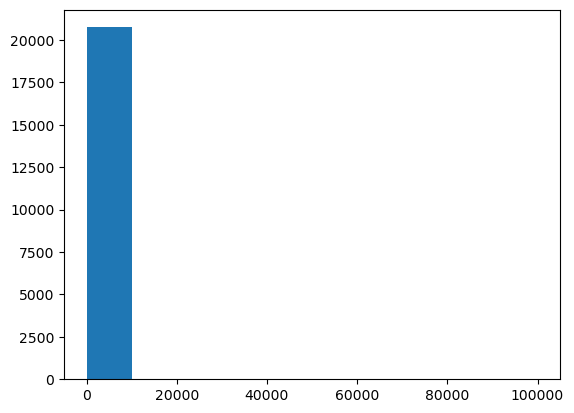

In [47]:
plt.hist(airbnb['price'])

The data is highly rightly skewed,lot of values are clustured around left side of the graph, because of the outlier 100k, actually not exactly an outlier their might be an actual room of 100k.

**BoxPlot**

<Axes: xlabel='price'>

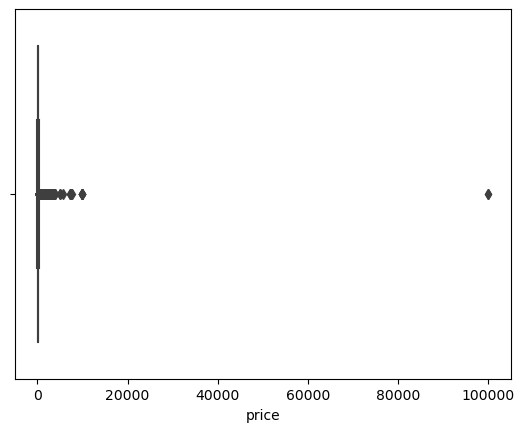

In [48]:
sns.boxplot(data=airbnb,x='price')

#### Decision
- Lots of values are below $15,000(still outliers) and only these 2 records have 100k room price, so i think its better to remove them because of this extreme outlier our distribution of the data is getting interrupted.
- Also we are doing analysis for a crowded audience at a whole, so keeping these points in mind its bettwe to remove this 100k value.

In [49]:
airbnb[(airbnb['price']>5000) & (airbnb['price']<=100000)]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type
906,3.899368e+07,298338860,The Gregory Hotel,Manhattan(New York),Midtown,40.75088,-73.98644,Private room,10000.0,30.0,...,0.02,3.0,365.0,0.0,Exempt,0,1,1,1.0,Boutique
2957,1.392586e+07,58480311,Sarah,Queens,Long Island City,40.76128,-73.93141,Entire home/apt,10000.0,30.0,...,0.31,1.0,0.0,0.0,No License,4,2,2,1.0,Rental
3031,3.121980e+07,172226912,Rom,Manhattan(New York),Murray Hill,40.74931,-73.97830,Shared room,10000.0,40.0,...,0.17,1.0,0.0,0.0,No License,5,4,5,2.0,Loft
3145,3.899349e+07,298338860,The Gregory Hotel,Manhattan(New York),Midtown,40.74924,-73.98722,Private room,10000.0,30.0,...,0.10,3.0,365.0,0.0,Exempt,3,1,2,1.0,Boutique
3995,1.716029e+07,110361431,Bobbi,Brooklyn,Bedford-Stuyvesant,40.69085,-73.93806,Private room,100000.0,30.0,...,0.96,2.0,346.0,10.0,No License,4,1,1,1.0,Rental
4533,3.899356e+07,298338860,The Gregory Hotel,Manhattan(New York),Midtown,40.74863,-73.98493,Private room,10000.0,30.0,...,0.06,3.0,365.0,0.0,Exempt,3,1,1,1.0,Boutique
4972,8.069030e+06,42619297,John,Brooklyn,Fort Greene,40.69231,-73.96967,Entire home/apt,7498.0,30.0,...,1.71,3.0,365.0,7.0,No License,5,4,5,2.0,Rental
5497,6.050000e+17,110361431,Bobbi,Brooklyn,Bedford-Stuyvesant,40.69254,-73.93636,Private room,100000.0,30.0,...,0.45,2.0,365.0,5.0,No License,4,1,1,1.0,Rental
6879,5.286206e+07,57586379,Chris,Manhattan(New York),Financial District,40.70641,-74.00920,Entire home/apt,10000.0,30.0,...,0.04,1.0,83.0,0.0,No License,0,Studio,1,1.0,Rental
7862,1.534502e+07,88972153,Elizabeth,Brooklyn,Greenpoint,40.73068,-73.95741,Private room,7500.0,31.0,...,0.55,1.0,358.0,0.0,No License,5,2,1,1.0,Place


**There are 15 records where price of airbnb is between 5,000 and 100k**

In [50]:
# 20,735 records of data below $5,000
airbnb[(airbnb['price']<5000)].shape

(20735, 22)

In [51]:
# Target audience
airbnb[(airbnb['price']>0) & (airbnb['price']<=1500)].shape

(20671, 22)

**Removing Outliers by filtering the data**

In [52]:
airbnb_fil = airbnb[(airbnb['price']<=500)]

In [53]:
# Now all the analysis will be done on this filtered dataset
airbnb_fil.shape

(20023, 22)

**Summarization on filtered data**

In [54]:
airbnb_fil.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,beds,baths
count,2.002300e+04,2.002300e+04,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000
mean,3.020417e+17,1.750108e+08,40.726625,-73.938005,145.826799,28.682865,43.148629,1.269475,19.255057,204.890526,11.007142,3.985666,1.661290,1.145907
std,3.893768e+17,1.723959e+08,0.060752,0.061669,92.388981,33.754878,74.285989,1.926178,72.045541,134.964329,21.633857,1.888629,1.070926,0.406224
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.710162e+07,2.068159e+07,40.683825,-73.979730,80.000000,30.000000,4.000000,0.210000,1.000000,86.000000,1.000000,4.000000,1.000000,1.000000
50%,4.994646e+07,1.100017e+08,40.721950,-73.948576,122.000000,30.000000,15.000000,0.660000,2.000000,211.000000,3.000000,5.000000,1.000000,1.000000
75%,7.190000e+17,3.144102e+08,40.763295,-73.916180,188.000000,30.000000,50.000000,1.820000,5.000000,352.000000,15.000000,5.000000,2.000000,1.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,500.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,5.000000,14.000000,11.500000


**BoxPlot**


<Axes: xlabel='price'>

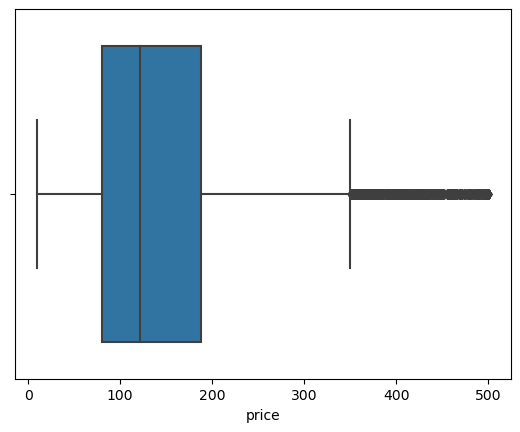

In [55]:
sns.boxplot(data=airbnb_fil,x='price')

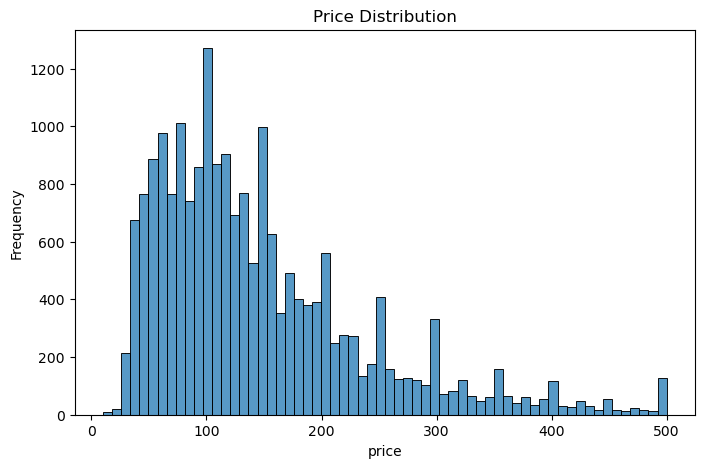

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(data = airbnb_fil,x='price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

This looks better now, its still skewed but better than before, there are still 20,000 bookings lying in this range.
- More than 1200 people have booked airbnb at the price range of 100 and 150

#### Average Price of airbnb in each neighbourhood

In [57]:
airbnb_fil.groupby(by='neighbourhood_group')['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan(New York)    169.662595
Brooklyn               142.419753
Queens                 117.182233
Staten Island          112.781250
Bronx                  106.043386
Name: price, dtype: float64

**Price per bed** (Feature Engineering)

In [58]:
airbnb_fil['price per bed'] = airbnb_fil['price']/airbnb_fil['beds']

In [59]:
airbnb_fil.head(3)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type,price per bed
0,1.312228e+06,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30.0,...,1.0,0.0,0.0,No License,5,1,1,0.0,Rental,55.0
1,4.527754e+07,51501835,Jeniffer,Manhattan(New York),Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,...,139.0,364.0,2.0,No License,5,2,1,1.0,Rental,144.0
2,9.710000e+17,528871354,Joshua,Manhattan(New York),Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,...,1.0,343.0,6.0,Exempt,4,1,2,1.0,Rental,93.5


**Average Price per bed**

In [60]:
airbnb_fil.groupby(by='neighbourhood_group')['price per bed'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan(New York)    124.886210
Brooklyn                95.767410
Queens                  75.379856
Bronx                   73.692227
Staten Island           67.187798
Name: price per bed, dtype: float64

## 5. Bivariate Analysis

**Pricing as per the city and its room type**

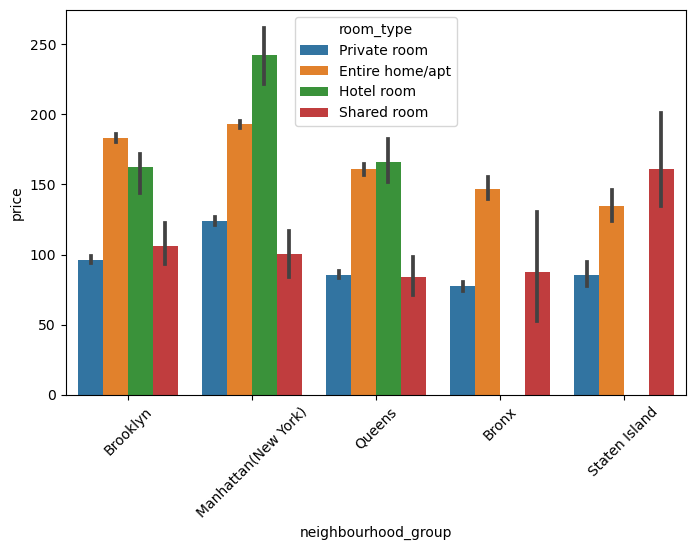

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(airbnb_fil,x='neighbourhood_group',y='price',hue='room_type')
plt.xticks(rotation=45) 
plt.show()

- Airbnb in Bronx are more affordable as compared to Manhattan - New york
- Shared room in Bronx and private room in staten Island are of almost same price, so its better to book a private room at affordable price in Staten island.
- Hotels are costlier in Manhattan as compared to the shared and private rooms there.

#### Relationship between Reviews and Prices


<Axes: xlabel='number_of_reviews_ltm', ylabel='price'>

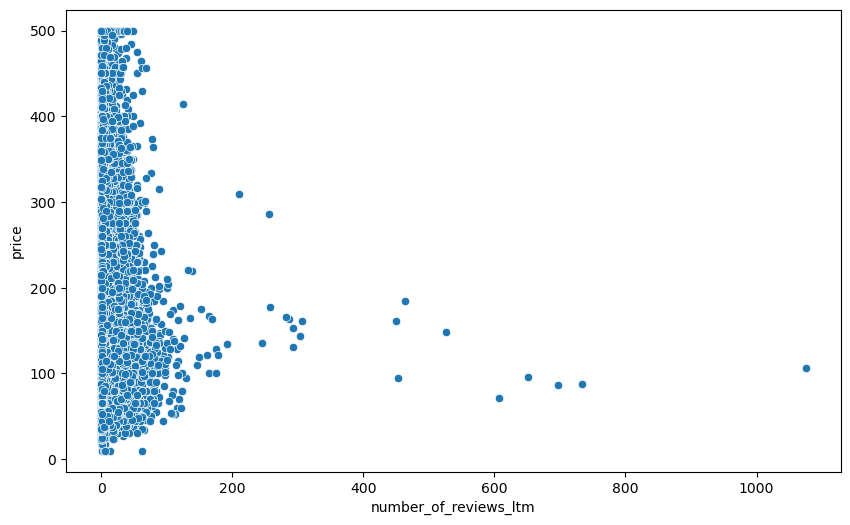

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_fil,x='number_of_reviews_ltm',y='price')

The higher the price, the chances of reviews decreases and vice versa.
Most of the reviews are of price range between 100-250

**Relationship between rating and price**

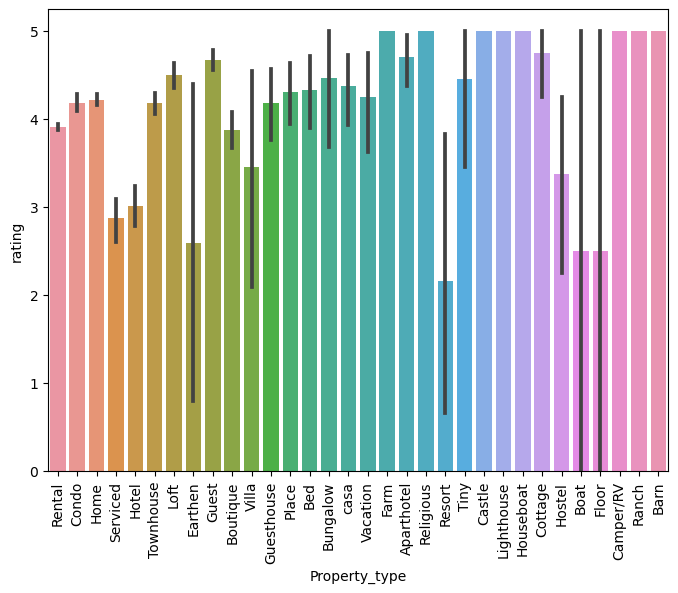

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(airbnb_fil,x='Property_type',y='rating')
plt.xticks(rotation=90)
plt.show()

Always go for a Condo, Townhouse, Castel, Lighthouse

In [65]:
airbnb_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20023 entries, 0 to 20769
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20023 non-null  float64
 1   host_id                         20023 non-null  int64  
 2   host_name                       20023 non-null  object 
 3   neighbourhood_group             20023 non-null  object 
 4   neighbourhood                   20023 non-null  object 
 5   latitude                        20023 non-null  float64
 6   longitude                       20023 non-null  float64
 7   room_type                       20023 non-null  object 
 8   price                           20023 non-null  float64
 9   minimum_nights                  20023 non-null  float64
 10  number_of_reviews               20023 non-null  float64
 11  last_review                     20023 non-null  object 
 12  reviews_per_month               20023

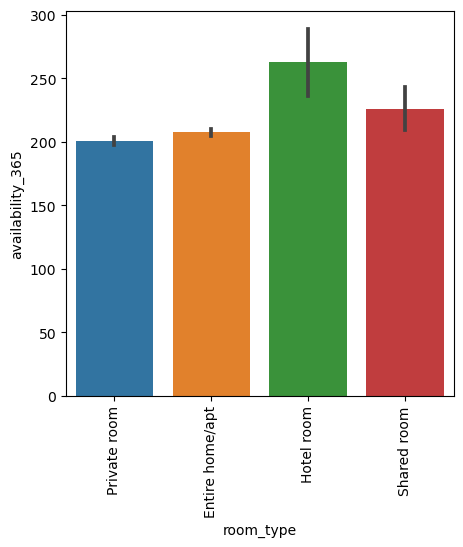

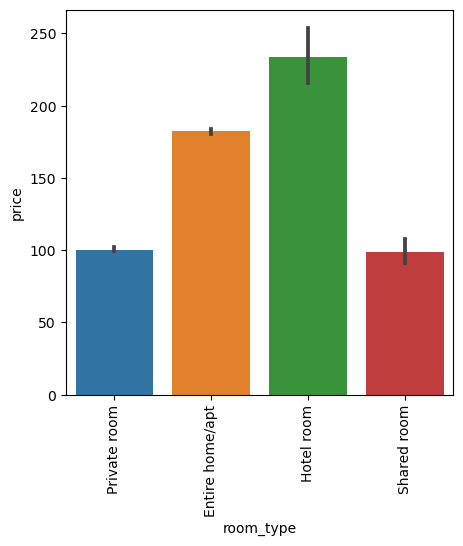

In [66]:
plt.figure(figsize=(5,5))
sns.barplot(airbnb_fil,y='availability_365',x='room_type')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(airbnb_fil,y='price',x='room_type')
plt.xticks(rotation=90)
plt.show()

- Hotels prices are quite high thats why people book less hotels whereas shared rooms are affordable still it tops 2nd because people dont want to share their room with strangers
- Hotels should lower their prices to attract more Crowd.
- High Pricing High availability

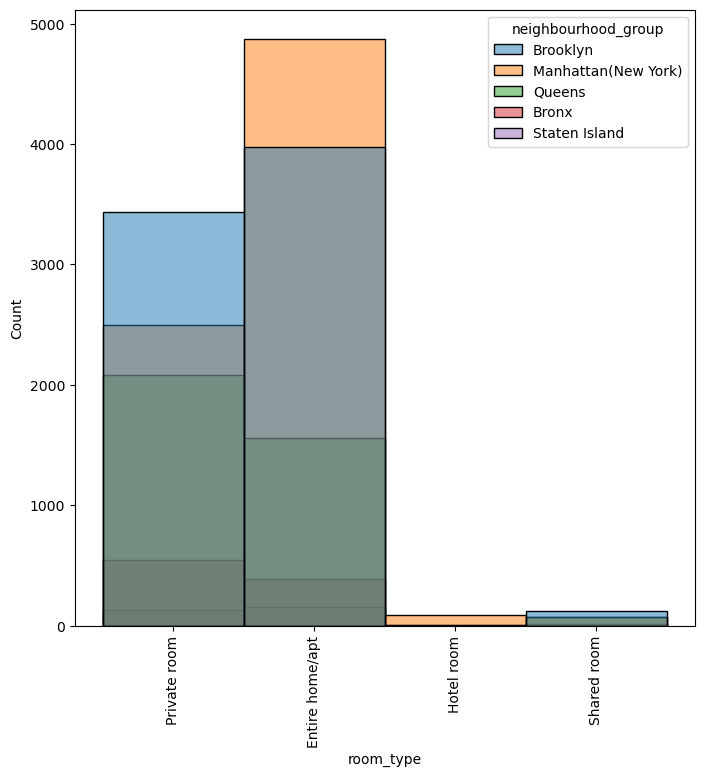

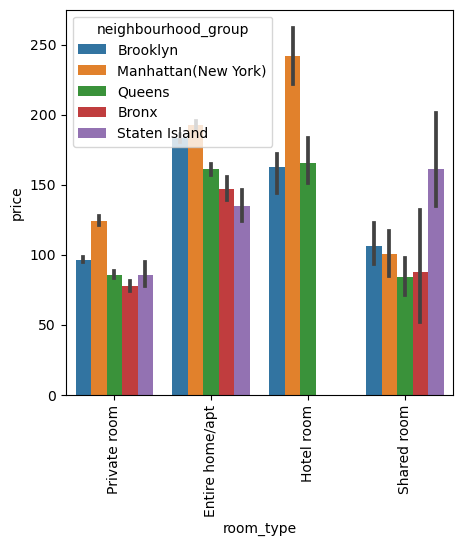

In [67]:
plt.figure(figsize=(8,8))
sns.histplot(airbnb_fil,x='room_type',hue='neighbourhood_group')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(5,5))
sns.barplot(airbnb_fil,y='price',x='room_type',hue='neighbourhood_group')
plt.xticks(rotation=90)
plt.show()

Entire home/apartment listings are through the roof in Manhattan

#### Geographical Distribution of Airbnb listings

<Axes: xlabel='longitude', ylabel='latitude'>

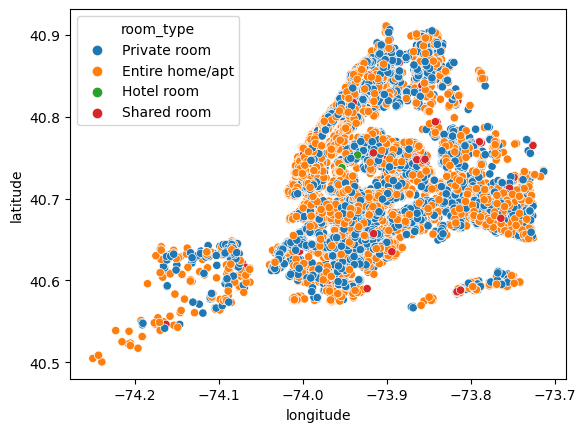

In [70]:
sns.scatterplot(data=airbnb_fil,x='longitude',y='latitude',hue='room_type')

In [82]:
airbnb[(airbnb['longitude']>=-74) & (airbnb['longitude']<=-72)].sample(3)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Property_type
9953,1.967311e+07,138526119,Richard,Queens,Rockaway Beach,40.586860,-73.815420,Entire home/apt,199.0,30.0,...,0.04,2.0,268.0,0.0,No License,0,1,1,1.0,Rental
2169,3.588072e+07,269885851,Sharon,Manhattan(New York),Lower East Side,40.722380,-73.992610,Entire home/apt,265.0,30.0,...,0.91,1.0,175.0,3.0,No License,5,2,2,2.0,Rental
15852,7.750000e+17,393897747,Stay And Smile,Manhattan(New York),Upper West Side,40.788614,-73.972841,Entire home/apt,102.0,30.0,...,0.41,9.0,324.0,2.0,No License,0,Studio,1,1.0,Rental


**As seen in the dataset above its clearly justified that maximum listings are from Manhattan and Brooklyn, also if any tourist are looking for an home/apartment or private rooms then these are the areas where they would find the most**

**Correlation Between one or more numerical column**


In [86]:
corr = airbnb_fil[['latitude','longitude','price','number_of_reviews','availability_365','rating','beds','price per bed']].corr()
corr




,latitude,longitude,price,number_of_reviews,availability_365,rating,beds,price per bed
latitude,1.000000,0.052078,-0.000816,-0.047756,-0.004924,-0.053744,-0.076576,0.053994
longitude,0.052078,1.000000,-0.199154,0.001324,0.068724,0.055576,0.062812,-0.252902
price,-0.000816,-0.199154,1.000000,-0.026670,0.028415,-0.000217,0.396892,0.649128
number_of_reviews,-0.047756,0.001324,-0.026670,1.000000,-0.049831,0.275815,0.045738,-0.054352
availability_365,-0.004924,0.068724,0.028415,-0.049831,1.000000,-0.044816,0.057649,-0.013361
rating,-0.053744,0.055576,-0.000217,0.275815,-0.044816,1.000000,0.054494,-0.043126
beds,-0.076576,0.062812,0.396892,0.045738,0.057649,0.054494,1.000000,-0.311117
price per bed,0.053994,-0.252902,0.649128,-0.054352,-0.013361,-0.043126,-0.311117,1.000000


<Axes: >

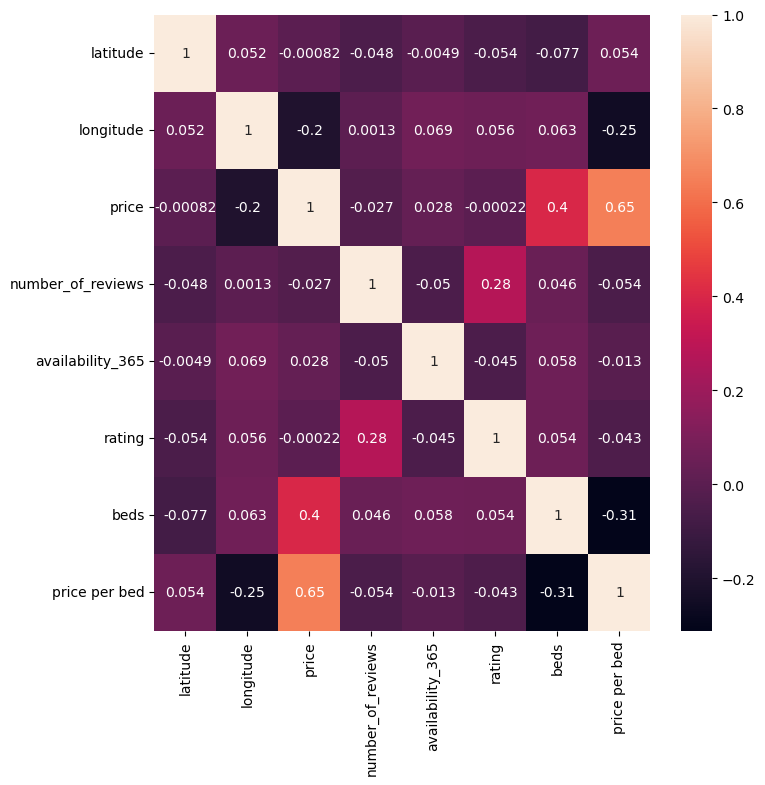

In [90]:
plt.figure(figsize=(8,8))
sns.heatmap(data=corr,annot=True)

Cannot see a huge correlation diff in any columns